<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-0.1">Libraries Used</a></span></li><li><span><a href="#Data-Science-Lifecycle" data-toc-modified-id="Data-Science-Lifecycle-0.2">Data Science Lifecycle</a></span></li></ul></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1">Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1.1">Questions</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2">Objectives</a></span></li><li><span><a href="#Import-Cleaned-Banking-Data" data-toc-modified-id="Import-Cleaned-Banking-Data-1.3">Import Cleaned Banking Data</a></span></li><li><span><a href="#Official-Exploratory-Data-Analysis" data-toc-modified-id="Official-Exploratory-Data-Analysis-1.4">Official Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#The-'job',-'education',-and-'y'-Columns-Bar-Graphs" data-toc-modified-id="The-'job',-'education',-and-'y'-Columns-Bar-Graphs-1.4.1">The 'job', 'education', and 'y' Columns Bar Graphs</a></span></li><li><span><a href="#The-'age',-'job',-and-'education'-Columns-Violin-Plots" data-toc-modified-id="The-'age',-'job',-and-'education'-Columns-Violin-Plots-1.4.2">The 'age', 'job', and 'education' Columns Violin Plots</a></span></li><li><span><a href="#The-'previous',--'month',-and-'y'-Columns-Combined-Point-Plot-and-Bar-Graphs" data-toc-modified-id="The-'previous',--'month',-and-'y'-Columns-Combined-Point-Plot-and-Bar-Graphs-1.4.3">The 'previous',  'month', and 'y' Columns Combined Point Plot and Bar Graphs</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Transforming-Categorical-Variables" data-toc-modified-id="Transforming-Categorical-Variables-2.1">Transforming Categorical Variables</a></span></li><li><span><a href="#Store-Variables-for-Next-Notebook" data-toc-modified-id="Store-Variables-for-Next-Notebook-2.2">Store Variables for Next Notebook</a></span></li><li><span><a href="#Other-Resources:" data-toc-modified-id="Other-Resources:-2.3">Other Resources:</a></span></li></ul></li></ul></div>

## Libraries Used

In [79]:
import pandas as pd
import statistics 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pointbiserialr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import make_scorer, plot_confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.pipeline import make_pipeline as impipemaker
import time
#%matplotlib inline


## Data Science Lifecycle
Like with every project, we must first look to map for our data filled journey:
![DataScienceLifecycle](./Data_Science_Process.png)

We use the above Data Science Lifecyle to structure and organize this project. In this project we will follow this structure. We will see, at times, these steps will be revisited.
# Business Understanding
From above, we see at "01" that we must obtain ask ourselves relevant questions and define objectives:
## Questions
* "What is the main goal of the bank?"
    * **To have a model that is the 'best' model; that is, has low false positives and low false negatives.**
* "Why did you pick those features as predictors?"
    * **These features will have p-values less than 0.05 and be associated with the clients who subscribed to a term deposit**
* "How confident are you in the predictive quality of the results?"
    * **Because we are only going to use features that have p-values less than 0.05, there is a 5% risk of concluding that these features influence subscribing clients when there is no actual influence.**
* "What are some of the things that could cause the results to be wrong?"
    * **Undetected collinearity, bias variance or inappropriate data exclusion.**

## Objectives
* Clean, explore, and model this dataset with multiple machine learning algorithms to predict who would be a subscribing client.
* Render at least 3 business recommendations that are supported.
* Demonstrate explored methods with benchmarks.
* Present 3 or more relevant visualizations. 
* Compare multiple models that were in and outside class material.
* Design a live demo that changes parameters and shows the output.
* Code following pep-8 standards, with docstrings/comments, and does not repeat itself; also uses cusotm classes methods for tasks.
* Conclusion is present and contains at least 3 recommendations that are business relevant.

## Import Cleaned Banking Data
First we are gonna bring in the  we obtained from [Preprocessing.ipynb](./Preprocessing.ipynb) with some python magic tricks.

In [1]:
%%capture 
#If this is your first time running my notebook or you skipped, run the below commented out code to run the necessary notebooks
%run ./Preprocessing.ipynb

%store -r
X_train_70_imp.info()

In [81]:
X_test_30_imp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12357 entries, 39914 to 3010
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             12357 non-null  int64  
 1   job             12357 non-null  object 
 2   marital         12357 non-null  object 
 3   education       12357 non-null  object 
 4   default         12357 non-null  object 
 5   housing         12357 non-null  object 
 6   loan            12357 non-null  object 
 7   contact         12357 non-null  object 
 8   month           12357 non-null  object 
 9   day_of_week     12357 non-null  object 
 10  campaign        12357 non-null  int64  
 11  previous        12357 non-null  int64  
 12  poutcome        12357 non-null  object 
 13  emp.var.rate    12357 non-null  float64
 14  cons.price.idx  12357 non-null  float64
 15  cons.conf.idx   12357 non-null  float64
 16  euribor3m       12357 non-null  float64
 17  nr.employed     12357 non-nu

In [82]:
y_train_70

35451    no
11069    no
21233    no
33258    no
6529     no
         ..
6500     no
21633    no
19857    no
14528    no
899      no
Name: y, Length: 28831, dtype: object

## Official Exploratory Data Analysis
### The 'job', 'education', and 'y' Columns Bar Graphs
We will take a quick look at 'job', 'education', and 'y' columns to get a better idea who would open a term deposit

In [83]:
# First we have to join together our target variable, 'y', and the 'job' and 'education' features.
pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1)

,job,education,y
35451,admin.,university.degree,no
11069,blue-collar,unknown,no
21233,admin.,university.degree,no
33258,blue-collar,basic.4y,no
6529,admin.,university.degree,no
...,...,...,...
6500,technician,university.degree,no
21633,admin.,university.degree,no
19857,admin.,university.degree,no
14528,blue-collar,unknown,no


Thanks to [Serenity](https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot#comment101763170_44882373), [Martin](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib), and inspiration from [Tarek Dib](https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb), we are able to create the below visuals:

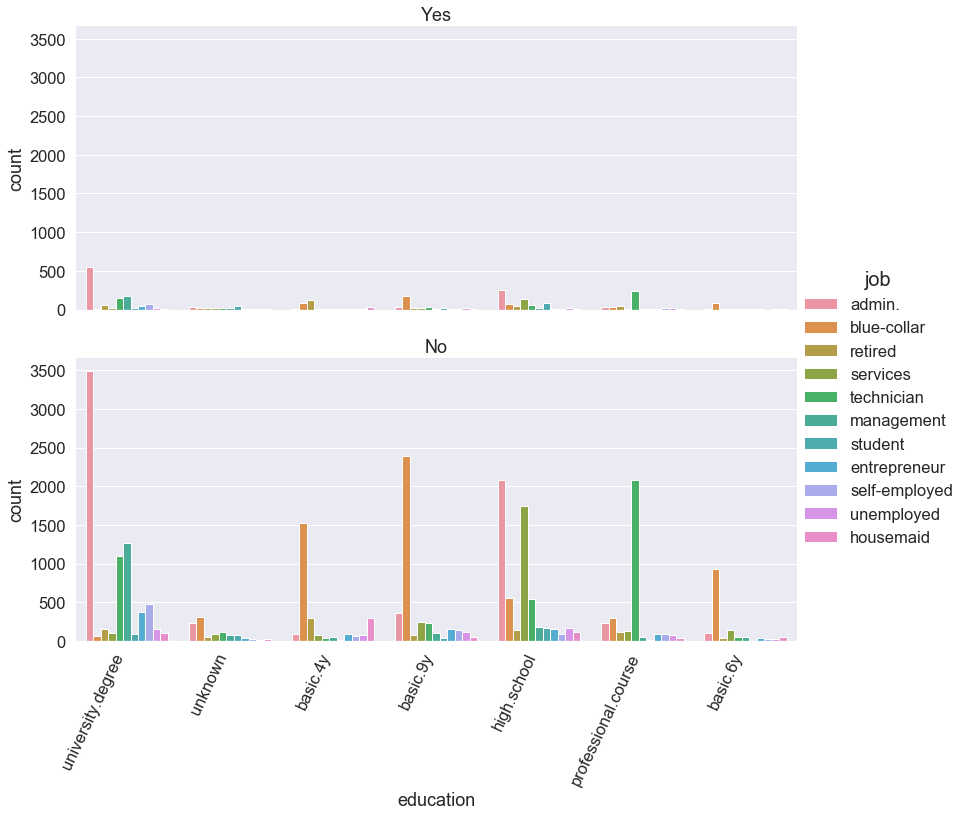

In [84]:
sns.set(font_scale=1.5) #this sets the font size of the graph
graph = sns.catplot(x='education', hue='job', row='y', orient="h",
            data=pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1),
            kind='count', height=5, aspect=2.25, sharey=True, row_order=['yes', 'no'])
plt.setp(graph._legend.get_title(), fontsize=20) #this resizes the legend font size

# here we rotate all the labels
for axes in graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
    axes.set_title(axes.get_title().split()[-1].title())
    
plt.show()

From the above graph we can kind of see that 'unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y' had more success than the other 'education' values. We will confrim this below:

In [85]:
# Here we group the data by 'job' and 'education', and we see if we can extract the specific 'yes' and 'no' distribution
# for a certain 'job' and 'education'
pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], 
          axis=1).groupby(by=['education', 'job']).get_group(('university.degree', 'admin.'))['y'].value_counts()

no     3485
yes     556
Name: y, dtype: int64

In [86]:
# We replicate what we observe from above by first creating our group dataframe
df_group = pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], 
          axis=1)

# Here we group all the data
group = df_group.groupby(by=['education', 'job'])

# Below we loop through all the different values for the 'education' and 'job' column
for education in df_group.education.unique():
    for job in df_group.job.unique():
        
        # Here we get the number of 'yes' and 'no's
        result = pd.concat([X_train_70_imp.loc[:,['job', 'education']], y_train_70],
                            axis=1).groupby(by=['education', 'job']).get_group((education, job))['y'].value_counts()
        
        if len(result) == 2: # if there are both 'yes' and 'no' values, continue
            if result.index[0] == 'yes': # if the first value are 'yes' values, continue
                percent = round((result[0])/(result[0]+result[1])*100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
                if percent >= 30: #if percent is greater than 30% continue
                    print(education, job, percent, '% {}'.format(result.index[0]))
            elif result.index[1] == 'yes':# if the second value are 'yes' values, continue
                percent = round((result[1])/(result[0]+result[1])*100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
                if percent >= 30:  #if percent is greater than 30% continue
                    print(education, job, percent, '% {}'.format(result.index[1]))
        elif result.index[0] == 'yes': #if the one (and only) value is 'yes', continue
            percent = round(result[0]/result[0] * 100.0, 2) # percent of 'yes' values i.e. yes/(yes+no) * 100
            if percent >= 30:#if percent is greater than 30% continue
                print(education, job, percent, '% {}'.format(result.index[0]))

unknown retired 32.35 % yes
unknown student 36.59 % yes
unknown unemployed 30.0 % yes
basic.4y retired 30.0 % yes
basic.4y student 37.5 % yes
basic.9y student 33.87 % yes
high.school student 32.24 % yes
professional.course student 47.83 % yes
basic.6y student 55.56 % yes


In [87]:
# Here we double check that 5/9 is ~ 56% for 'basic.6y' and 'student'
result = pd.concat([X_train_70_imp.loc[:,['job', 'education']], y_train_70],
                            axis=1).groupby(by=['education', 'job']).get_group(('unknown', 'student'))['y'].value_counts()
result

no     78
yes    45
Name: y, dtype: int64

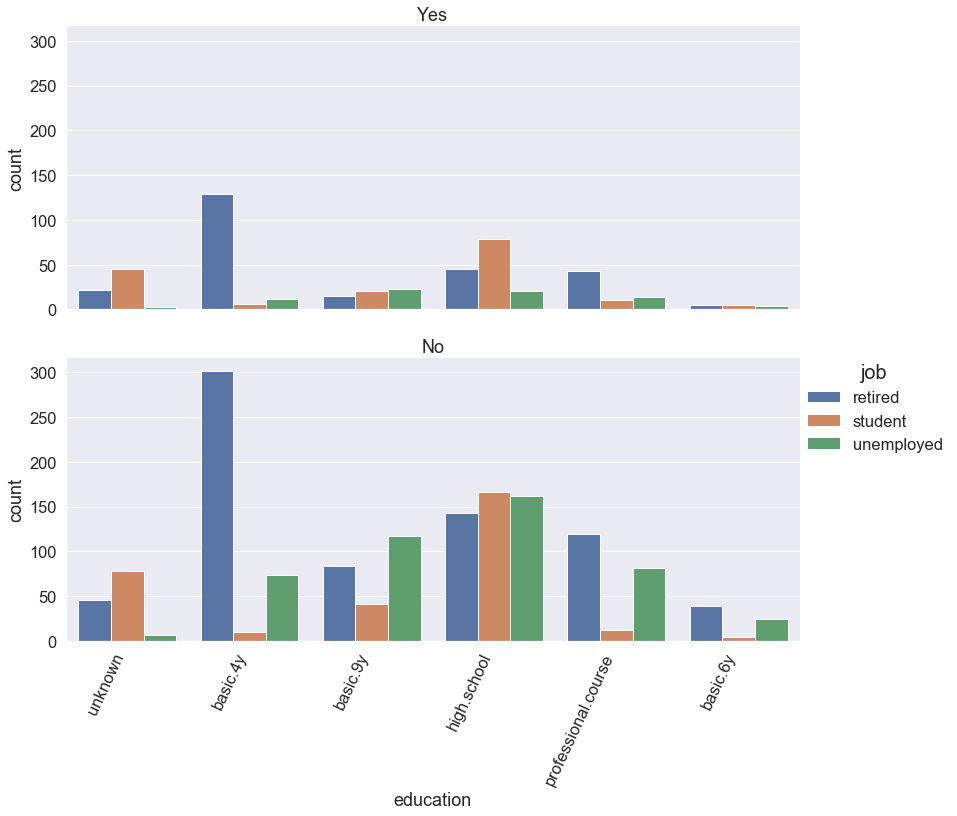

In [88]:
# Here we narrow our initial graph to three top 'job' values
sns.set(font_scale=1.5)
graph = sns.catplot(x='education', hue='job', row='y', orient="h",
            data=pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1),
            kind='count', height=5, aspect=2.25, sharey=True, hue_order=['retired', 'student', 'unemployed'],
            order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], row_order=['yes', 'no'])
plt.setp(graph._legend.get_title(), fontsize=20)
for axes in graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=65, horizontalalignment='right')
    axes.set_title(axes.get_title().split()[-1].title())
    
plt.show()

In [89]:
# Here we make a dataframe of those top 3 job and education pairs
data = pd.concat([X_train_70_imp.loc[:, ['job', 'education']], y_train_70], axis=1)
data_y = data[data['y']=='yes']
data_y

,job,education,y
39488,retired,basic.4y,yes
35117,management,university.degree,yes
40574,management,university.degree,yes
34364,self-employed,professional.course,yes
37133,management,university.degree,yes
...,...,...,...
27818,retired,basic.4y,yes
14553,blue-collar,basic.4y,yes
26246,blue-collar,basic.9y,yes
36166,management,university.degree,yes


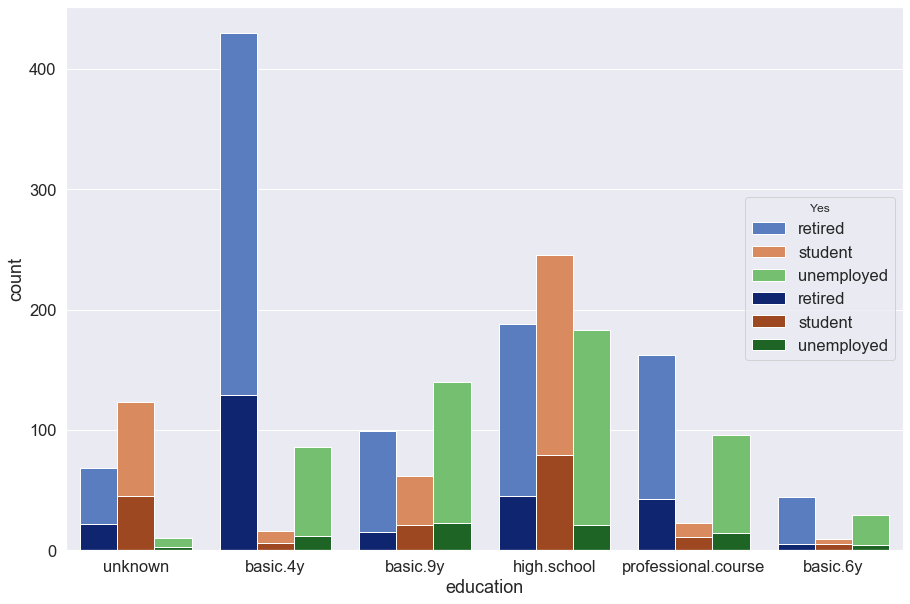

In [90]:
# Here we show the amount of 'yes' out of total counts
plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
graph = sns.countplot(x='education', hue='job', data=data,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.countplot(x='education', hue='job', data=data_y,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'))
plt.legend(loc=5).set_title('Yes')
plt.show()

In [91]:
# Here we are able to get the 'freq','count', 'top' for each job-education pair.
grouped = data.groupby(['education', 'job'], as_index=False).describe()
grouped

job                             education                            y  \
   count unique            top  freq     count unique       top  freq count   
0     98      1         admin.    98        98      1  basic.4y    98    98   
1   1605      1    blue-collar  1605      1605      1  basic.4y  1605  1605   
2    100      1   entrepreneur   100       100      1  basic.4y   100   100   
3    333      1      housemaid   333       333      1  basic.4y   333   333   
4     61      1     management    61        61      1  basic.4y    61    61   
..   ...    ...            ...   ...       ...    ...       ...   ...   ...   
72    23      1  self-employed    23        23      1   unknown    23    23   
73   106      1       services   106       106      1   unknown   106   106   
74   123      1        student   123       123      1   unknown   123   123   
75   136      1     technician   136       136      1   unknown   136   136   
76    10      1     unemployed    10        10      1   unknown    10    10   

                     
   unique top  freq  
0       2  no    87  
1       2  no  1522  
2       2  no    94  
3       2  no   299  
4       2  no    57  
..    ...  ..   ...  
72      2  no    21  
73      2  no    92  
74      2  no    78  
75      2  no   118  
76      2  no     7  

[77 rows x 12 columns]

In [92]:
# Extract the columns for column renaming
grouped.columns

MultiIndex([(      'job',  'count'),
            (      'job', 'unique'),
            (      'job',    'top'),
            (      'job',   'freq'),
            ('education',  'count'),
            ('education', 'unique'),
            ('education',    'top'),
            ('education',   'freq'),
            (        'y',  'count'),
            (        'y', 'unique'),
            (        'y',    'top'),
            (        'y',   'freq')],
           )

In [93]:
# Create new column names
new_col_names = []
for level, index in grouped.columns:

        new_col_names.append(level+'_'+index)

new_col_names

['job_count',
 'job_unique',
 'job_top',
 'job_freq',
 'education_count',
 'education_unique',
 'education_top',
 'education_freq',
 'y_count',
 'y_unique',
 'y_top',
 'y_freq']

In [94]:
# Set new column names
grouped.columns = new_col_names
grouped

,job_count,job_unique,job_top,job_freq,education_count,education_unique,education_top,education_freq,y_count,y_unique,y_top,y_freq
0,98,1,admin.,98,98,1,basic.4y,98,98,2,no,87
1,1605,1,blue-collar,1605,1605,1,basic.4y,1605,1605,2,no,1522
2,100,1,entrepreneur,100,100,1,basic.4y,100,100,2,no,94
3,333,1,housemaid,333,333,1,basic.4y,333,333,2,no,299
4,61,1,management,61,61,1,basic.4y,61,61,2,no,57
...,...,...,...,...,...,...,...,...,...,...,...,...
72,23,1,self-employed,23,23,1,unknown,23,23,2,no,21
73,106,1,services,106,106,1,unknown,106,106,2,no,92
74,123,1,student,123,123,1,unknown,123,123,2,no,78
75,136,1,technician,136,136,1,unknown,136,136,2,no,118


In [95]:
# We see that a majority of 'y_top' is 'no'
grouped['y_top'].value_counts()

no     76
yes     1
Name: y_top, dtype: int64

In [96]:
grouped[grouped['y_top']=='yes'] # this is the index where the single 'yes' for 'y_top' occurs

,job_count,job_unique,job_top,job_freq,education_count,education_unique,education_top,education_freq,y_count,y_unique,y_top,y_freq
19,9,1,student,9,9,1,basic.6y,9,9,2,yes,5


In [97]:
# Here we get a precentage of 'no' that occur in the total count
grouped.loc[:, 'no'] = np.array(grouped['y_freq'])/np.array(grouped['y_count'])

In [98]:
# Here we get a precentage of 'yes' that occur in the total count
grouped.loc[19, 'no'] = 1-grouped.loc[19, 'no']

In [99]:
grouped[grouped['y_top']=='yes'] # we show how we added a new column with precentage of 'no'

,job_count,job_unique,job_top,job_freq,education_count,education_unique,education_top,education_freq,y_count,y_unique,y_top,y_freq,no
19,9,1,student,9,9,1,basic.6y,9,9,2,yes,5,0.444444


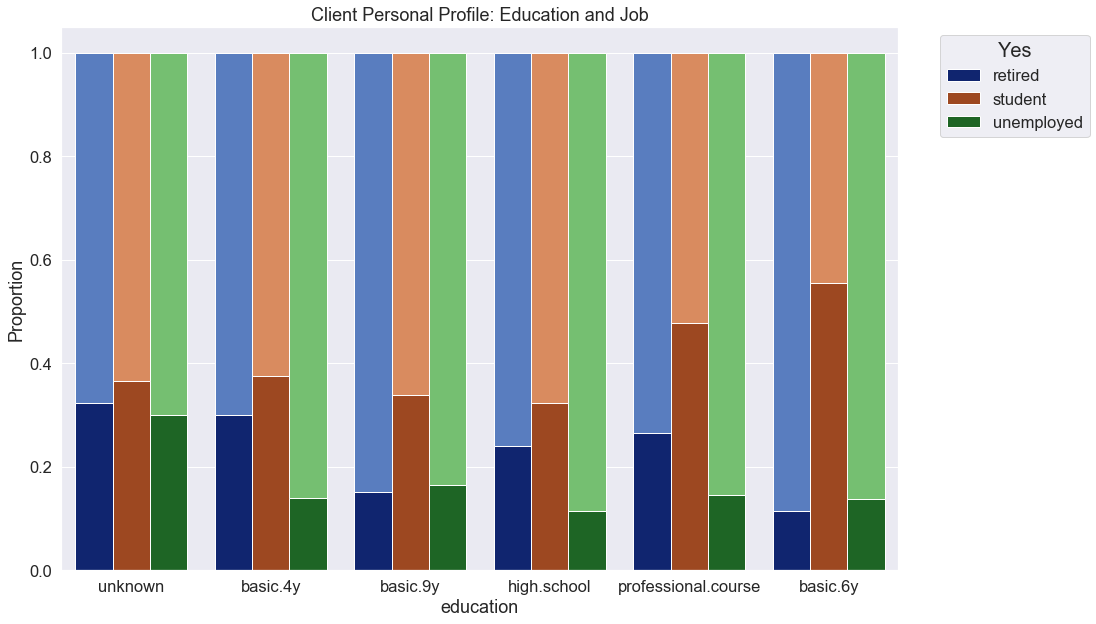

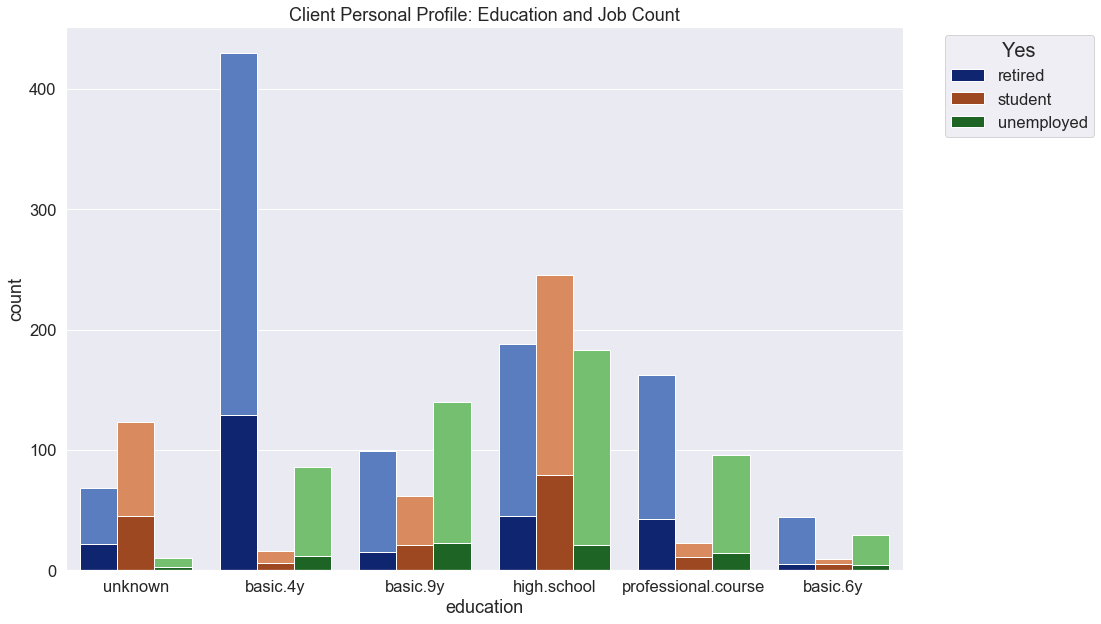

In [100]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
chart = sns.barplot(x='education_top', y=grouped.job_unique, hue='job_top', data=grouped,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.barplot(x='education_top', y=1-np.array(grouped.no), hue='job_top', data=grouped,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'), ax=chart)

#Below we must extract the handles and labels from our data to limit which ones are seen in our legend
artist_labels, legened_labels = chart.get_legend_handles_labels() # This outputs handles, and labels
plt.legend(bbox_to_anchor=(1.04,1), handles=artist_labels[3:6], labels=legened_labels[3:6], loc="upper left", title='Yes', 
           title_fontsize=20)

plt.title('Client Personal Profile: Education and Job')
plt.xlabel('education')
plt.ylabel('Proportion')
plt.show()

plt.figure(figsize=(15,10))
sns.set(style='darkgrid', font_scale=1.5)
graph = sns.countplot(x='education', hue='job', data=data,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], palette='muted')
sns.countplot(x='education', hue='job', data=data_y,
             hue_order=['retired', 'student', 'unemployed'],
             order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], 
             palette=sns.color_palette('dark'))
#Below we must extract the handles and labels from our data to limit which ones are seen in our legend
artist_labels, legened_labels = graph.get_legend_handles_labels() # This outputs handles, and labels
plt.legend(bbox_to_anchor=(1.04,1), handles=artist_labels[3:6], labels=legened_labels[3:6], loc="upper left", title='Yes', 
           title_fontsize=20)
plt.title('Client Personal Profile: Education and Job Count')
plt.show()

From this graph, we can see that we have >= 30% chance of the below individuals with the 'job'-'eduation' pair will sign up for a term deposit:

1. unknown retired 32.35%
2. unknown student 36.59% 
3. unknown unemployed 30.0%


4. basic.4y retired 30.0%
5. basic.4y student 37.5%


6. basic.9y student 33.87%


7. high.school student 32.24%
8. professional.course student 47.83%


9. basic.6y student 55.56%

### The 'age', 'job', and 'education' Columns Violin Plots
continuing what we learned from above, let us visualize the distribution of 'age' for 'job' and 'education'

In [101]:
# First we have to join together our target variable, 'y', and the 'job' and 'age' features.
pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1)

,age,job,education,y
35451,31,admin.,university.degree,no
11069,42,blue-collar,unknown,no
21233,35,admin.,university.degree,no
33258,42,blue-collar,basic.4y,no
6529,42,admin.,university.degree,no
...,...,...,...,...
6500,34,technician,university.degree,no
21633,45,admin.,university.degree,no
19857,30,admin.,university.degree,no
14528,39,blue-collar,unknown,no


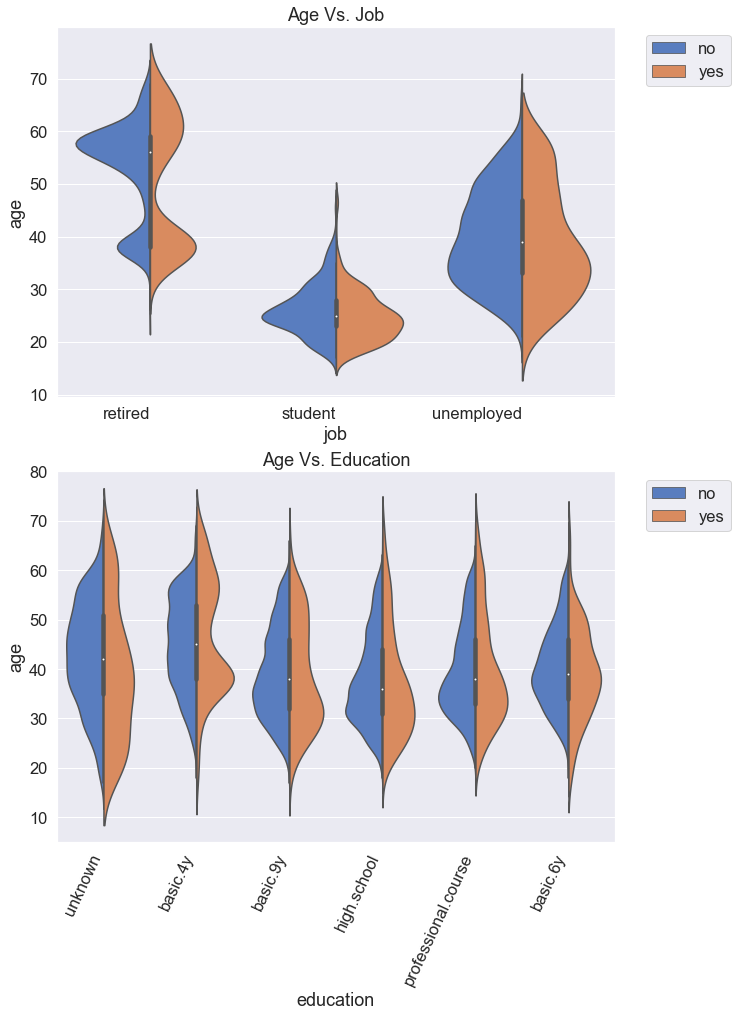

In [102]:
plt.figure(figsize=(10,15))
ax1 = plt.subplot(2,1,1)
chart = sns.violinplot(x="job", y="age", hue="y", 
               data=pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1),
                       palette="muted", split=True, order=['retired', 'student', 'unemployed'], ax=ax1)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
chart.set_xticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
plt.title('Age Vs. Job')

ax2 = plt.subplot(2,1,2)
chart = sns.violinplot(x="education", y="age", hue="y", 
               data=pd.concat([X_train_70_imp.loc[:, ['age', 'job', 'education']], y_train_70], axis=1), palette="muted", 
                       split=True,
                       order=['unknown', 'basic.4y', 'basic.9y', 'high.school', 'professional.course', 'basic.6y'], ax=ax2)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')
plt.title('Age Vs. Education')

plt.show()

From the above, we can uncover which 'age' range would be most likely to be within that >= 30% chance of the individuals with the 'job'-'eduation' pair that will sign up for a term deposit.

### The 'previous',  'month', and 'y' Columns Combined Point Plot and Bar Graphs
Finally, we will look at if calling a potential client an increasing amount of times on certain months leads to more term deposits opened.

In [103]:
# First we have to join together our target variable, 'y', and the 'job' and 'age' features.
pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1)

,previous,month,y
35451,0,may,no
11069,0,jun,no
21233,0,aug,no
33258,0,may,no
6529,0,may,no
...,...,...,...
6500,0,may,no
21633,0,aug,no
19857,0,aug,no
14528,0,jul,no


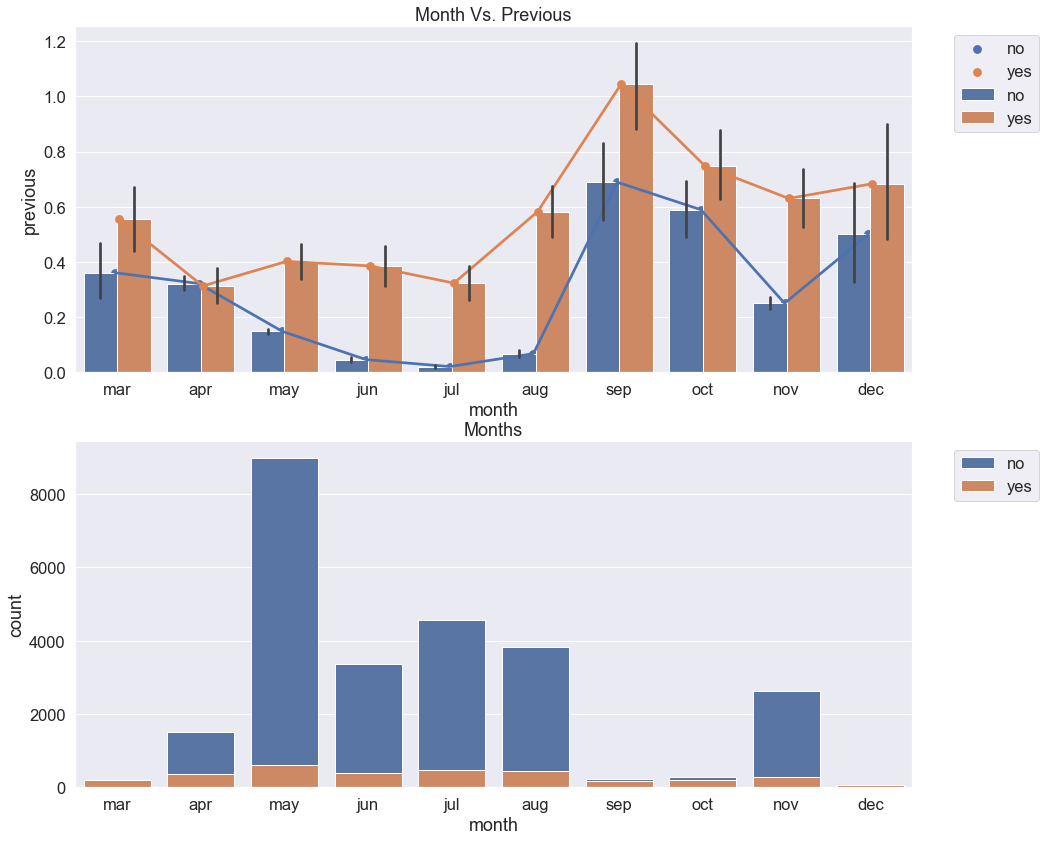

In [104]:
plt.figure(figsize=(15,14))
ax1 = plt.subplot(2,1,1)
sns.pointplot('month', 'previous', hue='y', 
              data=pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1),
             order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
             dodge=True, ax=ax1, ci=None)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Month Vs. Previous')

# ax2 = plt.subplot(2,1,1)
sns.barplot(x='month', y='previous', hue='y', data=pd.concat([X_train_70_imp.loc[:, ['previous', 'month']], y_train_70], axis=1), 
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax=ax1)
plt.title('Month Vs. Previous')

plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
ax3 = plt.subplot(2,1,2)
sns.countplot(x=X_train_70_imp.month, hue=y_train_70, orient="h", 
              order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], ax=ax3, dodge=False)
plt.title('Months')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

From above, we see that when more calls are made in certain months, there is a noticeable likelihood that a client will request a term deposit. For example, in september, october and november. Therefore, it appears to be advisable to call more during these months.

# Feature Engineering
Moving on to '05', we are tasked with selecting important features and constructing more meaningful ones using our data.

## Transforming Categorical Variables
we will go ahead and transform all our categorical variables with One Hot Encoding. NOTE: we could use label encoding, but we would have to assume ordinal factors that are not really clear for each variable. Doing one hot encoding does not biased our models which can happen with ordinal data.

In [105]:
# Here we look at the data types
X_train_70_imp.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [106]:
# Create our dummies for only X_Train_70_imp
catvar1 =  X_train_70_imp.select_dtypes(include='object').columns
dummies1 = pd.get_dummies(X_train_70_imp[catvar1], prefix=catvar1, columns=catvar1, drop_first=True)
dummies1

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
35451,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,1,0
11069,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
21233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
33258,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,1,0
6529,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,1,0
21633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
19857,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
14528,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [107]:
# below we drop the original values, so we can replace them with their dummy value equivalent
preprocessed1 = X_train_70_imp.copy()
preprocessed1 = preprocessed1.drop(catvar1, axis=1)
preprocessed1

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
35451,31,4,0,-1.8,92.893,-46.2,1.244,5099.1
11069,42,3,0,1.4,94.465,-41.8,4.962,5228.1
21233,35,1,0,1.4,93.444,-36.1,4.963,5228.1
33258,42,1,0,-1.8,92.893,-46.2,1.291,5099.1
6529,42,3,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...
6500,34,1,0,1.1,93.994,-36.4,4.857,5191.0
21633,45,2,0,1.4,93.444,-36.1,4.963,5228.1
19857,30,1,0,1.4,93.444,-36.1,4.966,5228.1
14528,39,4,0,1.4,93.918,-42.7,4.961,5228.1


In [108]:
# below we bring the dummies together with the continuous variables
processed_X_train_70_imp = pd.concat([preprocessed1, dummies1], axis=1)
processed_X_train_70_imp

,age,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
35451,31,4,0,-1.8,92.893,-46.2,1.244,5099.1,0,0,...,1,0,0,0,1,0,0,0,1,0
11069,42,3,0,1.4,94.465,-41.8,4.962,5228.1,1,0,...,0,0,0,0,0,0,0,1,1,0
21233,35,1,0,1.4,93.444,-36.1,4.963,5228.1,0,0,...,0,0,0,0,1,0,0,0,1,0
33258,42,1,0,-1.8,92.893,-46.2,1.291,5099.1,1,0,...,1,0,0,0,0,0,1,0,1,0
6529,42,3,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6500,34,1,0,1.1,93.994,-36.4,4.857,5191.0,0,0,...,1,0,0,0,0,0,0,1,1,0
21633,45,2,0,1.4,93.444,-36.1,4.963,5228.1,0,0,...,0,0,0,0,0,0,1,0,1,0
19857,30,1,0,1.4,93.444,-36.1,4.966,5228.1,0,0,...,0,0,0,0,0,0,0,0,1,0
14528,39,4,0,1.4,93.918,-42.7,4.961,5228.1,1,0,...,0,0,0,0,0,0,1,0,1,0


In [109]:
## We will just do one dummy set. Feel free to do others!
dummies1_test = pd.get_dummies(X_test_30_imp[catvar1], prefix=catvar1, columns=catvar1, drop_first=True)
preprocessed1_test = X_test_30_imp.copy()
preprocessed1_test = preprocessed1_test.drop(catvar1, axis=1)
processed_X_test_30_imp = pd.concat([preprocessed1_test, dummies1_test], axis=1) # Here is the final product for X_test_30_imp

## Store Variables for Next Notebook
From here, we can move on to the our predictive modeling in [Predcitive_Modeling.ipynb](./Predictive_Modeling.ipynb). Here, we will store our variables for use elsewhere.

In [110]:
#%store -z #This removes all previously stored variables
#%store #This allows you to see all previously stored variables

%store processed_X_train_70_imp
%store processed_X_test_30_imp

Stored 'processed_X_train_70_imp' (DataFrame)
Stored 'processed_X_test_30_imp' (DataFrame)


## Other Resources:
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://www.semanticscholar.org/paper/Using-data-mining-for-bank-direct-marketing%3A-an-of-Moro-Laureano/a175aeb08734fd669beaffd3d185a424a6f03b84
* https://pdfs.semanticscholar.org/1999/417377ec21ecf7f7f55af62975065f785fb2.pdf
